<a href="https://colab.research.google.com/github/Jose-Augusto-C-M/map_csv_plotter/blob/main/csv_merger_ploter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib-scalebar

<ipython-input-3-885dd586d6b8>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(custom_colormaps.get(column, 'jet'))


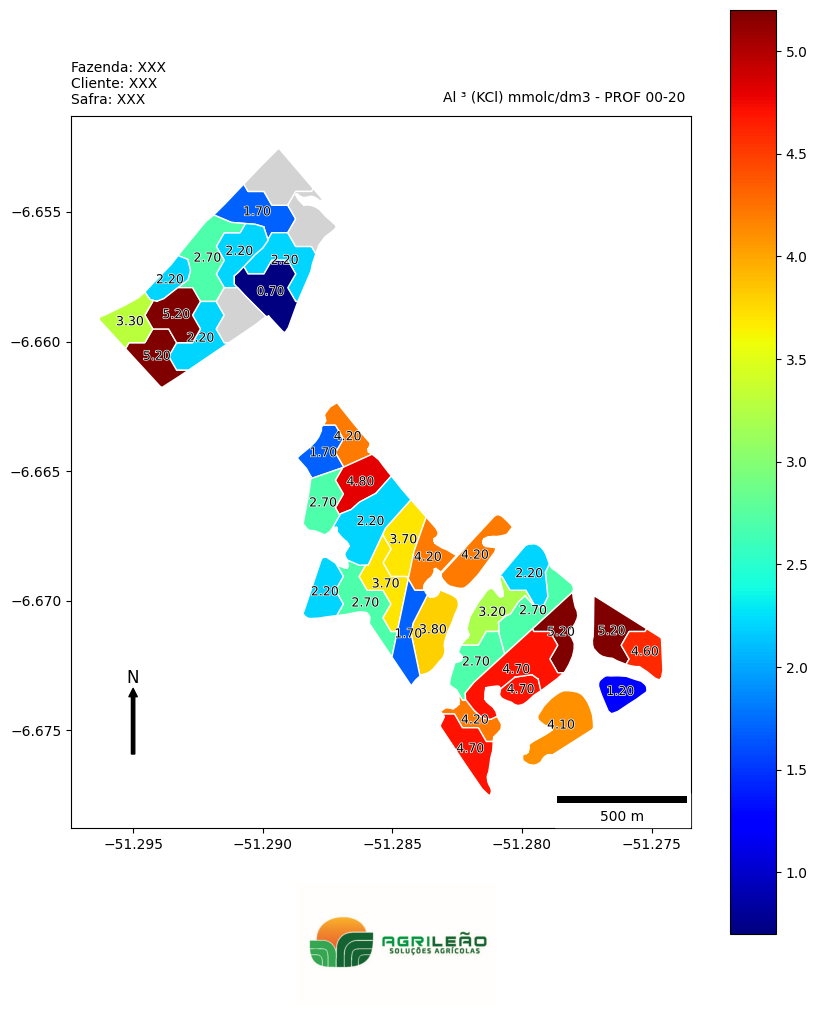

<ipython-input-3-885dd586d6b8>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(custom_colormaps.get(column, 'jet'))


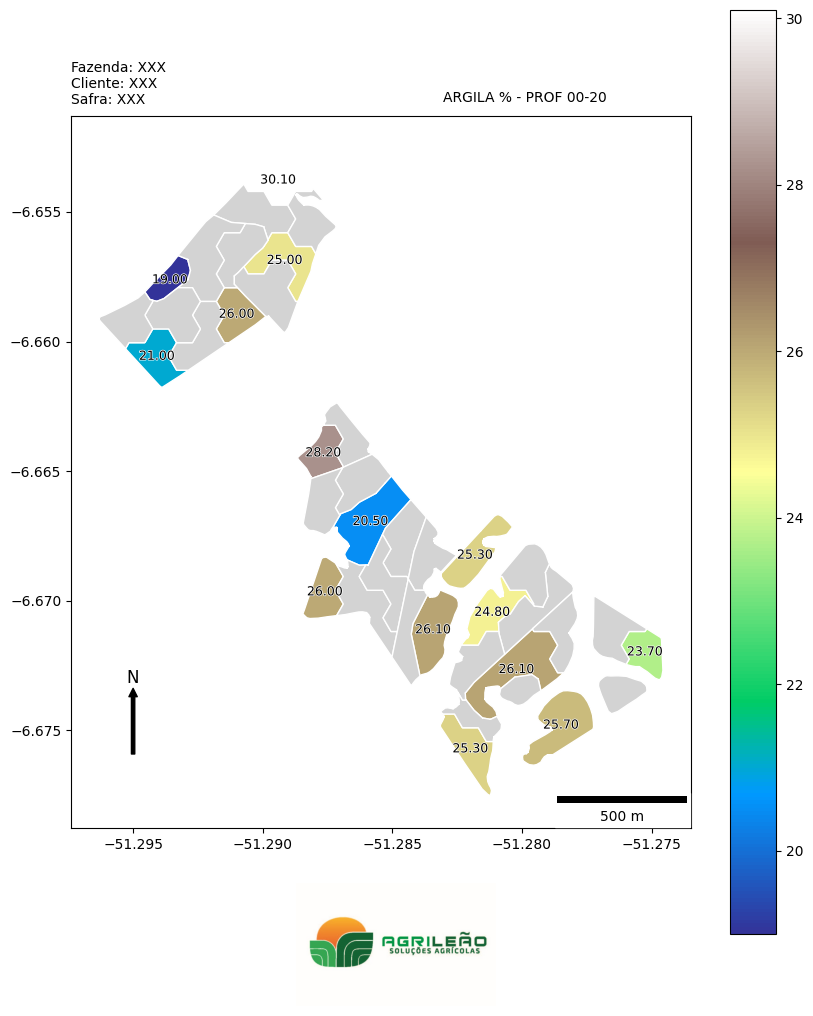

<ipython-input-3-885dd586d6b8>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(custom_colormaps.get(column, 'jet'))


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patheffects import withStroke
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import FancyArrowPatch, Rectangle
import matplotlib.patches as mpatches
import os
import pandas as pd
import geopandas as gpd
from shapely import wkt
import zipfile
import matplotlib.image as mpimg
from matplotlib_scalebar.scalebar import ScaleBar


# File paths
original_file_path = '/content/drive/MyDrive/agrileao/ARQUIVOS/PLANILHA/jose_file_v5.csv'
new_file_path = '/content/drive/MyDrive/agrileao/ARQUIVOS/PLANILHA/SOL23352023_id5.csv'
png_dir = '/content/drive/MyDrive/agrileao/ARQUIVOS/PLANILHA/png_images/'
pdf_dir = '/content/drive/MyDrive/agrileao/ARQUIVOS/PLANILLA/pdf_images/'
zip_filename_png = '/content/drive/MyDrive/agrileao/ARQUIVOS/PLANILHA/png_images.zip'
zip_filename_pdf = '/content/drive/MyDrive/agrileao/ARQUIVOS/PLANILHA/pdf_images.zip'
logo_path = '/content/drive/MyDrive/agrileao/ARQUIVOS/logoagrileao.jpeg'

# Ensure directories exist
os.makedirs(png_dir, exist_ok=True)
os.makedirs(pdf_dir, exist_ok=True)

# Columns to plot and custom settings
columns_to_plot = [
    'Al ³ (KCl) mmolc/dm3', 'ARGILA %', 'Areia Total g/kg', 'Argila g/kg', 'B (Água Quente) mg/dm3',
    'C.T.C. mmolc/dm3', 'Ca mmolc/dm3', 'Ca%', 'Cu (DTPA) mg/dm³', 'Fe_mg/dm3',
    'H + AL mmolc/dm3', 'K mmol/dm3', 'K%', 'M.O.(Oxidação) g/dm3', 'Mg mmolc/dm3',
    'Mg%', 'Mn (DTPA) mg/dm3', 'N (g/kg)', 'Na (Mehlich) mmolc/dm3', 'P (Resina) mg/dm3',
    'S (Fosfato de Cálcio) mg/dm3', 'S.B. mmolc/dm3', 'Silte g/kg', 'V%', 'Zn (DTPA) mg/dm3',
    'm%', 'pH (CaCl2)', 'pH água'
]

custom_colormaps = {
    'ARGILA %': 'terrain',
    "Al ³ (KCl) mmolc/dm3": "jet"
}

custom_limits = {}


# Read the original and new CSV files
df = gpd.read_file(original_file_path)
df['geometry'] = df['WKT'].apply(wkt.loads)
df['id'] = df['id'].astype(str)

new_df = pd.read_csv(new_file_path)
new_df['id'] = new_df['id'].astype(str)

# Merge the dataframes on the common 'id' column
merged_df = pd.merge(df, new_df, on='id', how='left')

# Initialize an empty list to store figure information
figure_list = []

# For each profile and column, plot the data, ensuring 0 values are plotted in gray
for prof_value in new_df['PROF'].unique():
    prof_subset = merged_df[merged_df['PROF'] == prof_value]
    if not prof_subset.empty:
        for column in columns_to_plot:
            fig, ax = plt.subplots(figsize=(10, 12))
            zeros = prof_subset[column] == 0
            non_zeros = prof_subset[column] != 0

            # Check if custom limits are defined for the current column
            if column in custom_limits:
                # Retrieve the colormap
                base_cmap = plt.cm.get_cmap(custom_colormaps.get(column, 'jet_r'))
                # Generate a list of colors from the colormap
                colors = base_cmap(np.linspace(0, 1, len(custom_limits[column])))
                # Create a ListedColormap with the generated colors
                cmap = ListedColormap(colors)
                # Create a boundary norm with the custom limits
                norm = BoundaryNorm(custom_limits[column], cmap.N)
                #norm = None
            else:
                # Use default colormap and normalization
                cmap = plt.cm.get_cmap(custom_colormaps.get(column, 'jet'))
                norm = None

            # Plot non-zero values with the specified colormap and normalization
            if non_zeros.any():
                prof_subset[non_zeros].plot(column=column, ax=ax, legend=True, edgecolor='white',
                                            cmap=cmap, norm=norm)

            # Plot zero values in gray
            if zeros.any():
                prof_subset[zeros].plot(ax=ax, color='lightgray', edgecolor='white')

            # Add annotations for non-zero values
            for idx, row in prof_subset[non_zeros].iterrows():
                ax.annotate(text=f"{row[column]:.2f}",
                            xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                            ha='center', va='center', fontsize=9,
                            path_effects=[withStroke(linewidth=1, foreground="white")])

            #ax.set_title(f"{column} - PROF {prof_value}")
            t=("Fazenda: XXX \nCliente: XXX \nSafra: XXX")
            plt.text(0, 1.02, t, transform=ax.transAxes,wrap=True)
            x=(f"{column} - PROF {prof_value}")
            plt.text(0.6, 1.02, x, transform=ax.transAxes,wrap=True)

            # Add North Arrow
            ax.annotate('', xy=(0.1, 0.2), xytext=(0.1, 0.1),
                        arrowprops=dict(facecolor='black', arrowstyle='simple', lw=1),
                        ha='center', va='center', fontsize=12, xycoords=ax.transAxes)
            ax.text(0.1, 0.21, 'N', transform=ax.transAxes, ha='center', va='center', fontsize=12)

            scalebar = ScaleBar(dx=100000, units='m', location='lower right',scale_loc='bottom', length_fraction=.25)
            ax.add_artist(scalebar)

            # Add logo
            logo_ax = fig.add_axes([0.35, 0.05, 0.2, 0.15], anchor='SW', zorder=1)
            logo_img = mpimg.imread(logo_path)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')

            plt.show()
            plt.close()

            # Append figure info for later saving
            figure_list.append((column, prof_value, fig))
